In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
# Đọc dữ liệu
file_path = 'dataset svm.csv' 
dataset = np.loadtxt(file_path,delimiter=',',dtype=str, encoding='utf-8-sig')
y = dataset[:,0]
X = np.delete(dataset,0,1).astype(dtype='<i2')

In [3]:
list(set(list(y)))

['M', 'T', 'K']

In [4]:

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
# Tinh chỉnh tham số mô hình
kernel = 'rbf'
C = 1
gamma = 0.01

In [7]:
# Tạo và huấn luyện mô hình
classifier = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.01, random_state=42)

In [8]:
# Lưu trình chuẩn hóa và mô hình 
with open('model.pkl', 'wb') as model_file:
    
    pickle.dump({'model': classifier, 'scaler': sc}, model_file)

In [9]:
# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_pred = classifier.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy on Test Set: 0.7183098591549296
Confusion Matrix on Test Set:
 [[55  5  5]
 [ 5 25  7]
 [11  7 22]]
Classification Report on Test Set:
               precision    recall  f1-score   support

           K       0.77      0.85      0.81        65
           M       0.68      0.68      0.68        37
           T       0.65      0.55      0.59        40

    accuracy                           0.72       142
   macro avg       0.70      0.69      0.69       142
weighted avg       0.71      0.72      0.71       142



In [10]:
# Dự đoán và đánh giá mô hình trên tập huấn luyện
y_train_pred = classifier.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred, zero_division=1))

Accuracy on Training Set: 0.8900709219858156
Confusion Matrix on Training Set:
 [[214   3   0]
 [  6 155   2]
 [ 44   7 133]]
Classification Report on Training Set:
               precision    recall  f1-score   support

           K       0.81      0.99      0.89       217
           M       0.94      0.95      0.95       163
           T       0.99      0.72      0.83       184

    accuracy                           0.89       564
   macro avg       0.91      0.89      0.89       564
weighted avg       0.90      0.89      0.89       564



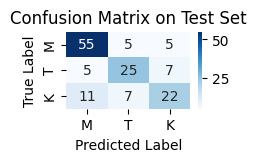

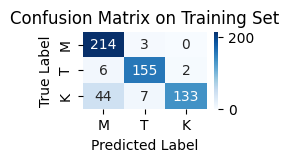

In [11]:
import seaborn as sns

# Vẽ ma trận nhầm lẫn cho tập kiểm tra
plt.figure(figsize=(2, 1))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=list(set(list(y))), yticklabels=list(set(list(y))))
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Vẽ ma trận nhầm lẫn cho tập huấn luyện
plt.figure(figsize=(2, 1))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=list(set(list(y))), yticklabels=list(set(list(y))))
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Định nghĩa mô hình với tham số C và gamma cần kiểm tra
classifier = SVC(kernel='rbf', C=1, gamma=0.000001, random_state=42)

# Sử dụng StratifiedKFold để đảm bảo phân phối đồng đều giữa các lớp
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

# Cross-Validation trên tập kiểm tra
cv_scores_test = cross_val_score(classifier, X_test, y_test, cv=cv)
print(f"Cross-Validation Scores on Test Set: {cv_scores_test}")
print(f"Mean Cross-Validation Score on Test Set: {np.mean(cv_scores_test)}")

# Cross-Validation trên tập huấn luyện
cv_scores_train = cross_val_score(classifier, X_train, y_train, cv=cv)
print(f"Cross-Validation Scores on Training Set: {cv_scores_train}")
print(f"Mean Cross-Validation Score on Training Set: {np.mean(cv_scores_train)}")

Cross-Validation Scores on Test Set: [0.44827586 0.44827586 0.46428571 0.46428571 0.46428571]
Mean Cross-Validation Score on Test Set: 0.45788177339901487
Cross-Validation Scores on Training Set: [0.38938053 0.38938053 0.38053097 0.38053097 0.38392857]
Mean Cross-Validation Score on Training Set: 0.38475031605562576
